# SENTIMENT ANALYSIS BASED ON COVID-19 TWEETS

### Problem statement:
Create a classification model to predict the sentiment either (Positive or Negative) based on Covid Tweets

### Context:
The tweets have been pulled from Twitter and manual tagging has been done.The names and usernames have been given codes to avoid any privacy concerns.


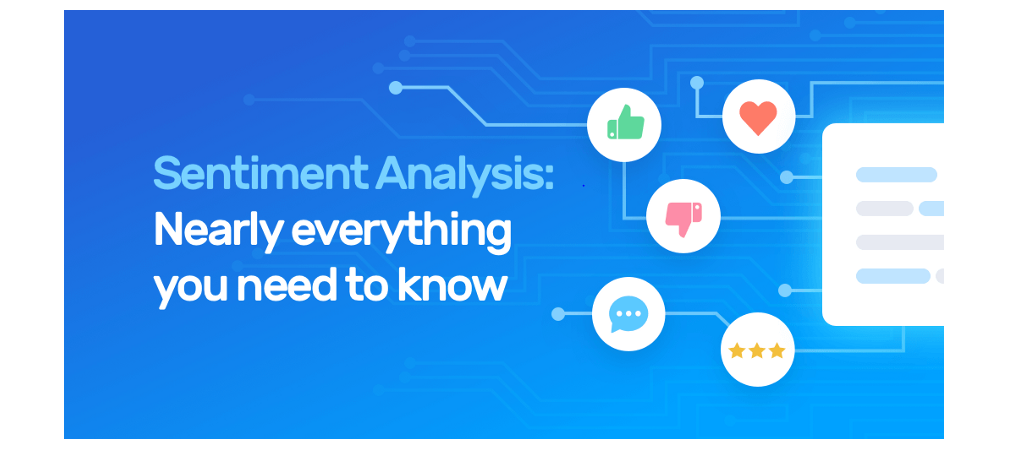

# Workflow

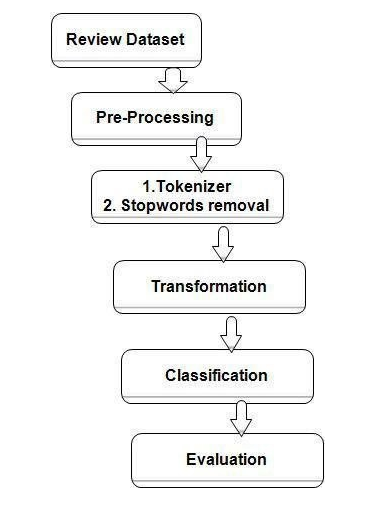

# Let's invite some libraries

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('Corona_NLP.csv',encoding = 'latin1')
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [ ]:
df.shape # rows - 41157  columns - 6

(41157, 6)

In [ ]:
df.duplicated().sum()

0

In [ ]:
# All the tweets have been made in the month of March and April of the year 2020
df.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [ ]:
# There are a total of 12220 different locations from where tweets have been generated
df.Location.value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [ ]:
df.Sentiment.value_counts() # 5 types of Sentiments in our Dataset

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

## Exploratory Data Analysis
### Having a look at some of the Tweets that have been made and the Sentiments that they signify

In [ ]:
df[df['Sentiment'] == 'Positive']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
...,...,...,...,...,...,...
41140,44939,89891,Pakistan,14-04-2020,Good News! \r\r\nWe'll Soon Announce Our High ...,Positive
41145,44944,89896,"Manhattan, NY",14-04-2020,How exactly are we going to re-open New York C...,Positive
41146,44945,89897,"Gurgaon, India",14-04-2020,#Gold prices rose to a more than 7-year high t...,Positive
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive


In [ ]:
df[df['Sentiment'] == 'Positive'].loc[6,'OriginalTweet']

'Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented "I\'m in Civics class so I know what I\'m talking about". https://t.co/ieFDNeHgDO'

- The above tweet signifies a <b>Positive Sentiment</b> (insights,credibility)

In [ ]:
df[df['Sentiment'] == 'Negative']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative
24,3823,48775,Downstage centre,16-03-2020,@10DowningStreet @grantshapps what is being do...,Negative
26,3825,48777,"Ketchum, Idaho",16-03-2020,In preparation for higher demand and a potenti...,Negative
28,3827,48779,"New York, NY",16-03-2020,Do you see malicious price increases in NYC? T...,Negative
30,3829,48781,NaN,16-03-2020,There Is of in the Country The more empty she...,Negative
...,...,...,...,...,...,...
41127,44926,89878,NaN,14-04-2020,Today at the grocery store I saw someone getti...,Negative
41131,44930,89882,"Accra, Ghana",14-04-2020,In every human affliction there are gainers a...,Negative
41147,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,Negative
41149,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative


In [ ]:
df[df['Sentiment'] == 'Negative'].loc[28,'OriginalTweet']

'Do you see malicious price increases in NYC? The NYC Department of Consumer and Worker Protection (DCWP) has set up a page to digitally file a complaint. Click here: https://t.co/oEx6Y8mm2K\r\r\n\r\r\nTo file a complaint (use the word"Overcharge") https://t.co/MdMmoBttOP\r\r\n#COVID19 #CovidNYC'

- The above tweet signifies a <b>Negative Sentiment</b> (malicious,complaint)

In [ ]:
df[df['Sentiment'] == 'Neutral']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
10,3809,48761,"Makati, Manila",16-03-2020,All month there hasn't been crowding in the su...,Neutral
16,3815,48767,Saudi Arabia,16-03-2020,????? ????? ????? ????? ??\r\r\n?????? ????? ?...,Neutral
17,3816,48768,"Ontario, Canada",16-03-2020,@eyeonthearctic 16MAR20 Russia consumer survei...,Neutral
...,...,...,...,...,...,...
41141,44940,89892,India,14-04-2020,#Coronavirus ?? ????? ??? ????? ?? ??? ???????...,Neutral
41143,44942,89894,In burning hell.,14-04-2020,https://t.co/8s4vKvcO1r #5gtowers?? #EcuadorUn...,Neutral
41144,44943,89895,NaN,14-04-2020,@_Sunrise_SV @Gamzap @NPR What does not having...,Neutral
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral


In [ ]:
df[df['Sentiment'] == 'Neutral'].loc[7,'OriginalTweet']

"Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ"

- The above tweet signifies a <b>Neutral Sentiment</b>

In [ ]:
df[df['Sentiment'] == 'Extremely Positive']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
11,3810,48762,"Pitt Meadows, BC, Canada",16-03-2020,"Due to the Covid-19 situation, we have increas...",Extremely Positive
12,3811,48763,Horningsea,16-03-2020,#horningsea is a caring community. LetÂs ALL ...,Extremely Positive
18,3817,48769,North America,16-03-2020,"Amazon Glitch Stymies Whole Foods, Fresh Groce...",Extremely Positive
22,3821,48773,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
23,3822,48774,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
...,...,...,...,...,...,...
41137,44936,89888,"LES, NYC",14-04-2020,Distilleries have switched portions of their p...,Extremely Positive
41138,44937,89889,"Los Angeles, CA",14-04-2020,HMU FOR PRICES!! Got great deals going right n...,Extremely Positive
41142,44941,89893,Juba south sudan,14-04-2020,@MajangChien @MTNSSD @MTNSSD is worst than COV...,Extremely Positive
41148,44947,89899,NaN,14-04-2020,UV light Sterilizer Sanitizer for your mask an...,Extremely Positive


In [ ]:
df[df['Sentiment'] == 'Extremely Positive'].loc[11,'OriginalTweet']

'Due to the Covid-19 situation, we have increased demand for all food products. \r\r\n\r\r\nThe wait time may be longer for all online orders, particularly beef share and freezer packs. \r\r\n\r\r\nWe thank you for your patience during this time.'

- The above tweet signifies an <b>Extremely Positive Sentiment</b> (increased,thank you,patience)

In [ ]:
df[df['Sentiment'] == 'Extremely Negative']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
20,3819,48771,southampton soxx xxx,16-03-2020,with 100 nations inficted with covid 19 th...,Extremely Negative
27,3826,48778,Everywhere You Are!,16-03-2020,This morning I tested positive for Covid 19. I...,Extremely Negative
29,3828,48780,"Someplace, USA",16-03-2020,@7SealsOfTheEnd Soon with dwindling supplies u...,Extremely Negative
42,3841,48793,Houston,16-03-2020,CHECK VIDEO ?? https://t.co/1ksn9Brl02 ??No fo...,Extremely Negative
...,...,...,...,...,...,...
41115,44914,89866,NaN,14-04-2020,Food Banks are not equipped for a 30% unemploy...,Extremely Negative
41128,44927,89879,"Melbourne, Australia",14-04-2020,The COVID-19 pandemic and global oil price war...,Extremely Negative
41130,44929,89881,NaN,14-04-2020,Squeo works in the meat department of a Kroger...,Extremely Negative
41133,44932,89884,Austria,14-04-2020,A Singaporean politician who slammed a woman s...,Extremely Negative


In [ ]:
df[df['Sentiment'] == 'Extremely Negative'].loc[20,'OriginalTweet']

'with 100  nations inficted with  covid  19  the world must  not  play fair with china  100 goverments must demand  china  adopts new guilde  lines on food safty  the  chinese  goverment  is guilty of  being  irosponcible   with life  on a global scale'

- The above tweet signifies an <b>Extremely Negative Sentiment</b> (inflicted,guilty,irosponcible)

## Handling Null values

In [ ]:
df.head() # We can observe that the 'Location' column has null values - NaN

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df['Location'].isnull().sum() # 8590 missing values in 'Location'

8590

### Heat map for the missing values

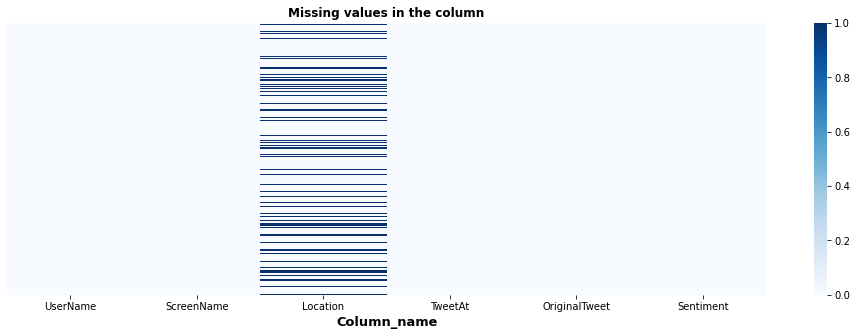

In [ ]:
plt.figure(figsize=(17,5))
sns.heatmap(df.isnull(),cbar = True,yticklabels = False,cmap ='Blues')
plt.xlabel('Column_name',weight = 'bold',size = 13)
plt.title("Missing values in the column",weight = 'bold')
plt.show()

In [ ]:
df.dropna(subset=['Location'], how='all', inplace=True)
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive


##### We have REMOVED all 'NaN' rows from the 'Location' column.
##### Though we haveThe 'Location' column is not useful for our sentiment analysis.</b>

### Top 10 Locations of Tweets generated

In [ ]:
top10_locations_of_tweet = df['Location'].value_counts().head(10)
sns.set(rc = {"figure.figsize" : (12,8)}) # width - 12   height - 8
sns.set_style('white')

In [ ]:
top10_locations_of_tweet.head(10)

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

In [ ]:
# Creating a DataFrame for "The top 10 Locations of Tweets generated"

In [ ]:
top10_locations_of_tweet_df = pd.DataFrame(top10_locations_of_tweet)
top10_locations_of_tweet_df.reset_index(inplace = True)
top10_locations_of_tweet_df.rename(columns = {'index':'Location','Location':'Tweet_count'},inplace = True)
top10_locations_of_tweet_df

,Location,Tweet_count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


In [ ]:
# Creating a BarPlot for " The top 10 Locations of Tweets generated"

[Text(0, 0, 'London'),
 Text(1, 0, 'United States'),
 Text(2, 0, 'London, England'),
 Text(3, 0, 'New York, NY'),
 Text(4, 0, 'Washington, DC'),
 Text(5, 0, 'United Kingdom'),
 Text(6, 0, 'Los Angeles, CA'),
 Text(7, 0, 'India'),
 Text(8, 0, 'UK'),
 Text(9, 0, 'Australia')]

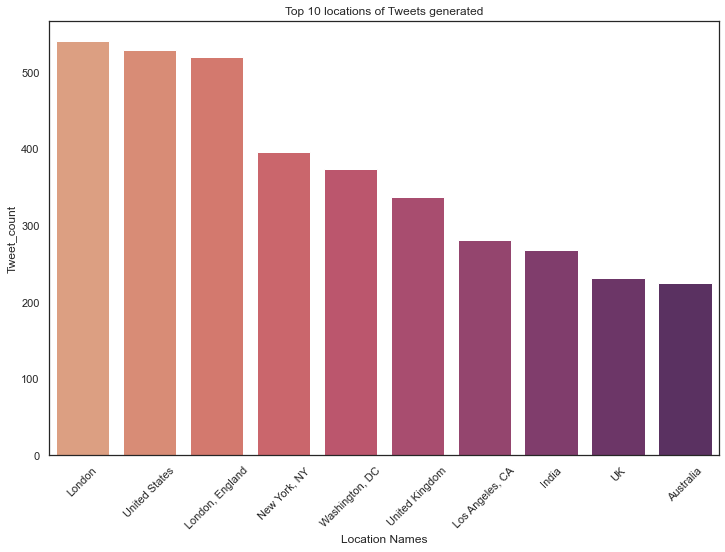

In [ ]:
barplt = sns.barplot(x = 'Location',y = 'Tweet_count',data = top10_locations_of_tweet_df,
                      palette = 'flare')
barplt.set_title("Top 10 locations of Tweets generated")
barplt.set_ylabel("Tweet_count")
barplt.set_xlabel("Location Names")
barplt.set_xticklabels(barplt.get_xticklabels(),rotation = 45)

### Generating  a SENTIMENT COUNTPLOT for better visualization

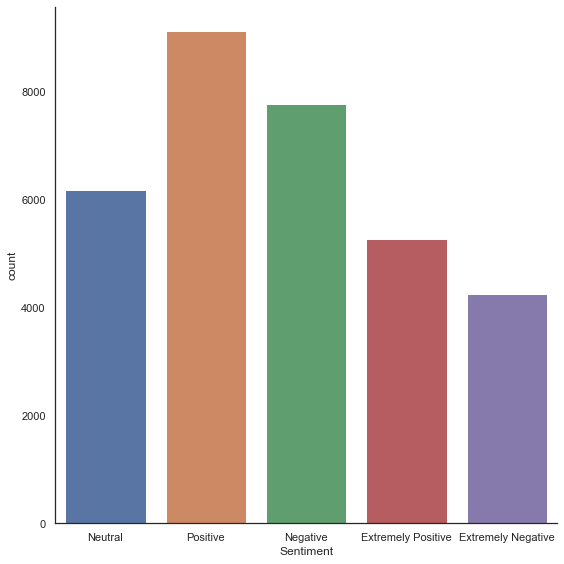

In [ ]:
sns.catplot("Sentiment", data=df, kind="count", height=8)
sns.set(font_scale = 1.1)

In [ ]:
df.TweetAt.value_counts()

20-03-2020    2618
19-03-2020    2614
25-03-2020    2384
18-03-2020    2183
21-03-2020    2066
22-03-2020    1618
23-03-2020    1604
17-03-2020    1555
08-04-2020    1527
07-04-2020    1487
06-04-2020    1372
09-04-2020    1185
24-03-2020    1167
13-04-2020    1148
26-03-2020    1025
05-04-2020     880
10-04-2020     815
02-04-2020     779
11-04-2020     722
03-04-2020     656
04-04-2020     615
12-04-2020     593
16-03-2020     529
01-04-2020     503
27-03-2020     280
31-03-2020     253
14-04-2020     210
29-03-2020      95
30-03-2020      65
28-03-2020      19
Name: TweetAt, dtype: int64

## DATA PREPROCESSING

In [ ]:
import nltk

#### a) Tokenizing words
#### b) Convert words to lower case
#### c) Removing Punctuations
#### d) Removing Stop words
#### e) Stemming or lemmatizing the words

In [ ]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [ ]:
sw = stopwords.words('English')
print(sw)
lm = WordNetLemmatizer()

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
tweet = []
for i in df['OriginalTweet']:
    t = re.sub('[^A-Za-z0-9]',' ',i)   # Removing punctuations
    t = t.lower()                      # Conversion to Lowercase
    t = word_tokenize(t)               # Tokenizing words
    t = [i for i in t if i not in sw]  # Removing Stop words
    t = [lm.lemmatize(i) for i in t]   # Lemmatization
    t = " ".join(t)
    tweet.append(t)

In [ ]:
print(tweet[:10])

['menyrbie phil gahan chrisitv http co ifz9fan2pa http co xx6ghgfzcc http co i2nlzdxno8', 'advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shopping account po adequate supply regular med order', 'coronavirus australia woolworth give elderly disabled dedicated shopping hour amid covid 19 outbreak http co binca9vp8p', 'news region first confirmed covid 19 case came sullivan county last week people flocked area store purchase cleaning supply hand sanitizer food toilet paper good tim dodson report http co cfxch7a2lu', 'cashier grocery store sharing insight covid 19 prove credibility commented civics class know talking http co iefdnehgdo', 'supermarket today buy toilet paper rebel toiletpapercrisis covid 19 http co evxkqlidaz', 'due covid 19 retail store classroom atlanta open walk business class next two week beginning monday march 16 continue process online phone order normal thank understanding http co kw

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

### Binary Classification of the 5 unique Sentiments into Positive and Negative

In [ ]:
df.Sentiment.replace('Positive',1,inplace=True)
df.Sentiment.replace('Extremely Positive',1,inplace=True)
df.Sentiment.replace('Neutral',1,inplace=True)
df.Sentiment.replace('Negative',0,inplace=True)
df.Sentiment.replace('Extremely Negative',0,inplace=True)

In [ ]:
df.Sentiment.value_counts()

1    20555
0    12012
Name: Sentiment, dtype: int64

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,1
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,1
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,1
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,1


In [ ]:
cv = CountVectorizer(max_features = 1500)
sm = cv.fit_transform(tweet).toarray()  # Sparse_matrix
print(len(cv.get_feature_names()))
print(sm.shape)

1500
(32567, 1500)


In [ ]:
print(len(sm[0]))
print(len(sm[2345]))
print(len(sm[31500]))
print(len(sm[9000]))

1500
1500
1500
1500


## Splitting data into training and test data

In [ ]:
x = sm         # Independent feature
y = df['Sentiment'] # Target Variable
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [ ]:
print(sm[:4])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24425, 1500)
(8142, 1500)
(24425,)
(8142,)


### 1) Multinomial Naïve Bayes Classification

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
m1 = MultinomialNB()
m1.fit(x_train,y_train)

MultinomialNB()

In [ ]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[1 1 0 ... 1 1 0]


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
cm_m1 = confusion_matrix(y_test,ypred_m1)
print(cm_m1)
print(classification_report(y_test,ypred_m1))

[[1918 1053]
 [ 836 4335]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67      2971
           1       0.80      0.84      0.82      5171

    accuracy                           0.77      8142
   macro avg       0.75      0.74      0.75      8142
weighted avg       0.77      0.77      0.77      8142



In [ ]:
from sklearn.metrics import accuracy_score
NB_acc = accuracy_score(ypred_m1,y_test)
print(NB_acc)

0.7679931220830263


#### Multinomial  Naïve Bayes Classifier generates an accuracy of 76.7%

### 2) SVM Classification

In [ ]:
from sklearn.svm import SVC

In [ ]:
m2 = SVC(kernel = 'linear',C = 1)
m2.fit(x_train,y_train)


SVC(C=1, kernel='linear')

In [ ]:
ypred_m2= m2.predict(x_test)
print(ypred_m2)

[1 1 1 ... 1 1 0]


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm_m2 = confusion_matrix(y_test,ypred_m2)
print(cm_m2)
print(classification_report(y_test,ypred_m2))

[[2096  875]
 [ 483 4688]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76      2971
           1       0.84      0.91      0.87      5171

    accuracy                           0.83      8142
   macro avg       0.83      0.81      0.81      8142
weighted avg       0.83      0.83      0.83      8142



In [ ]:
from sklearn.metrics import accuracy_score
SVM_acc = accuracy_score(ypred_m2,y_test) # SVM - Linear
print(SVM_acc)

0.8332105133873741


####  SVM classifier generates an accuracy of 83.3%

### 3) KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
m3 = KNeighborsClassifier(n_neighbors = 2999)
m3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2999)

In [ ]:
ypred_m3 = m3.predict(x_test)
print(ypred_m3)

[1 1 1 ... 1 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm_m3 = confusion_matrix(y_test,ypred_m3)
print(cm_m3)
print(classification_report(y_test,ypred_m3))

[[   0 2971]
 [   0 5171]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2971
           1       0.64      1.00      0.78      5171

    accuracy                           0.64      8142
   macro avg       0.32      0.50      0.39      8142
weighted avg       0.40      0.64      0.49      8142



In [ ]:
from sklearn.metrics import accuracy_score
KNN_acc = accuracy_score(ypred_m3,y_test)
print(KNN_acc)

0.6351019405551461


#### KNN Classifier generates an accuracy of 63.5%

## WINNER MODEL:     SVM CLASSIFIER !

In [ ]:
models = pd.DataFrame({
    'Model': ['Naive Bayes','SVM','KNN'],
    'Test accuracy': [NB_acc,SVM_acc,KNN_acc]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
1,SVM,0.833211
0,Naive Bayes,0.767993
2,KNN,0.635102
